# ___Fuzzy String Matching___

## ___Fuzzy Logic___
_Fuzzy logic is a form of multi-valued logic that deals with reasoning that is approximate rather than fixed and exact. Fuzzy logic values range between 1 and 0. i.e the value may range from completely true to completely false. In contrast, Boolean Logic is a two-valued logic: true or false usually denoted 1 and 0 respectively, that deals with reasoning that is fixed and exact. Fuzzy logic tends to reflect how people think and attempts to model our decision making hence it is now leading to new intelligent systems(expert systems)._

_So, if we are comparing two strings using fuzzy logic, we would be trying to answer the question “How similar are string A and string B?”, and rephrasing it as “Are string A and String B the same?” when using the Boolean Logic._

## ___Fuzzy String Matching___
_Fuzzy String Matching, also known as Approximate String Matching, is the process of finding strings that approximately match a pattern. The process has various applications such as spell-checking, DNA analysis and detection, spam detection, plagiarism detection e.t.c_

_There are many methods of comparing string in python. Some of the main methods are:_

* _Using regex_
* _Simple compare_
* _Using difflib_

## ___FuzzyWuzzy___
_While working with string matching problems in Python, you can import FuzzyWuzzy. FuzzyWuzzy is a Python library that uses Levenshtein distance to calculate the differences between sequences in a simple-to-use package._

In [1]:
from fuzzywuzzy import process, fuzz

### ___Levenshtein Distance___
_Also known as the edit distance, Levenshtein Distance (LD) is a parameter used in String matching, that basically measures the minimum number of operations/edits required to change a particular string into some other string. The operations involved in the above process include:_

* _Addition_
* _Substitution_
* _Deletion_

_Every operation done to change a given string into the other one adds 1 to the Levenshtein distance counter. For an instance, adding an alphabet results in +1. Substituting a letter or removing it also gives +1._

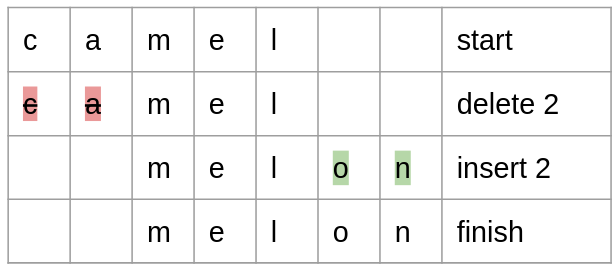
_Edits required to change “camel” into “melon” using 4 edits total_

_The Levenshtein distance algorithm has been used in:_
* _Spell checking_
* _Speech recognition_
* _DNA analysis_
* _Plagiarism detection_

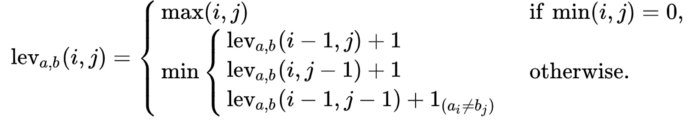

_[Reference](https://medium.com/analytics-vidhya/levenshtein-distance-for-dummies-dd9eb83d3e09)_
_[Video Reference](https://www.youtube.com/watch?v=We3YDTzNXEk)_

```
from Levenshtein import distance as levenshtein_distance
```

In [17]:
from Levenshtein import distance as levenshtein_distance

levenshtein_distance('Hello World','Helly Piyush')

7

## ___Fuzzy Module___

### ___Simple Ratio___
_The ratio method compares the whole string and follows the standard Levenshtein distance similarity ratio between two strings. It will compare the entire strings and output the percentage matched:_

In [2]:
String_Matched = fuzz.ratio('Hello World', 'Hello World!')
print("String Matched:",String_Matched)

String_Matched = fuzz.ratio('Hello World', 'Hello world')
print("String Matched:",String_Matched)

String_Matched = fuzz.ratio('Hello world', 'Hello world')
print("String Matched:",String_Matched)

String Matched: 96
String Matched: 91
String Matched: 100


### ___Partial Ratio___
_The partial ratio method works on “optimal partial” logic. If the short string k and long string m are considered, the algorithm will score by matching the length of the k string:_

In [3]:
Str_Partial_Match = fuzz.partial_ratio('Hello World', 'Hello World!')
print("String Matched:",Str_Partial_Match)

Str_Partial_Match = fuzz.partial_ratio('Hello World', 'Hello world')
print("String Matched:",Str_Partial_Match)

String Matched: 100
String Matched: 91


_The code above will look for only the partial match. In the first case, the smaller string (Hello World) will be looked into the larger string and matching will occur._

_While in the second case, the length of the strings is the same, but the alphabets will be matched_

### ___Token Sort Ratio___
_The token sort ratio method sorts the tokens alphabetically. Then, the simple ratio method is applied to output the matched percentage.The code above will ignore the order of the words._

In [4]:
Str_Sort_Match = fuzz.token_sort_ratio('Hello World', 'Hello wrld')
print("String Matched:",Str_Partial_Match)

Str_Sort_Match = fuzz.token_sort_ratio('Hello World', 'world Hello')
print("String Matched:",Str_Partial_Match)

String Matched: 91
String Matched: 91


### ___Token Set Ratio___
_The token set ratio ignores the duplicate words. It is similar to the sort ratio method but more flexible. It basically extracts the common tokens and then applies fuzz.ratio() for comparisons:_

In [5]:
String_Matched=fuzz.token_set_ratio('Hello World', 'Hello Hello world')
print(String_Matched)

100


## ___Process Module___

### ___Extract___
_The extract method from the process module calculates the similarity score of the vector of strings:_

In [6]:
# I have to match the list of strings (strOptions) with the str2Match:

str2Match = "apple inc"
strOptions = ["Apple Inc.","apple park","apple incorporated","iphone"]

Ratios = process.extract(str2Match,strOptions)

# The extract method will score each string from the list based on the similarity with 
# the matching string (str2Match).

print(Ratios)

[('Apple Inc.', 100), ('apple incorporated', 90), ('apple park', 67), ('iphone', 30)]


### ___Extract One___
_The extractOne method outputs the most similar string with its score out of the vector of strings:_

In [7]:
Ratios = process.extractOne(str2Match,strOptions)
print(Ratios)

('Apple Inc.', 100)


## ___Code Example___

In [8]:
import pandas as pd

df = pd.read_csv(r'C:\Users\PiyushSin\Data Science\NLP\room_type.csv')
df.head()

,Expedia,Booking.com
0,"Deluxe Room, 1 King Bed",Deluxe King Room
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room


In [9]:
df.shape

(103, 2)

In [10]:
def get_ratio(row):
    name = row['Expedia']
    name1 = row['Booking.com']
    return fuzz.token_set_ratio(name, name1)

df[df.apply(get_ratio, axis=1) > 70]

,Expedia,Booking.com
0,"Deluxe Room, 1 King Bed",Deluxe King Room
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room
...,...,...
97,"Room, 1 King Bed, Resort View (Alii)",Alii Tower Resort View With King Bed
98,"Room, 1 King Bed, Accessible, Resort View (Ali...",Alii Tower Resort View With King Bed - Mobilit...
99,"Room, 1 King Bed, Accessible, View (Rainbow, B...",Rainbow Tower Ocean View With King Bed - Mobil...
100,"Room, 1 King Bed, Ocean View (Alii)",Alii Tower Ocean View With King Bed


In [11]:
len(df[df.apply(get_ratio, axis=1) > 70]) / len(df)

0.9029126213592233

_Over 90% of the pairs exceed a match score of 70._

In [12]:
df[df.apply(lambda row: fuzz.token_set_ratio(row['Expedia'], row['Booking.com']), axis=1) > 60]

,Expedia,Booking.com
0,"Deluxe Room, 1 King Bed",Deluxe King Room
1,"Standard Room, 1 King Bed, Accessible",Standard King Roll-in Shower Accessible
2,"Grand Corner King Room, 1 King Bed",Grand Corner King Room
3,"Suite, 1 King Bed (Parlor)",King Parlor Suite
4,"High-Floor Premium Room, 1 King Bed",High-Floor Premium King Room
...,...,...
98,"Room, 1 King Bed, Accessible, Resort View (Ali...",Alii Tower Resort View With King Bed - Mobilit...
99,"Room, 1 King Bed, Accessible, View (Rainbow, B...",Rainbow Tower Ocean View With King Bed - Mobil...
100,"Room, 1 King Bed, Ocean View (Alii)",Alii Tower Ocean View With King Bed
101,"Room, 1 King Bed, Oceanfront (Rainbow)",Rainbow Tower Ocean Front with King Bed


In [13]:
len(df[df.apply(lambda row: fuzz.token_set_ratio(row['Expedia'], row['Booking.com']), axis=1) > 60])/ len(df)

0.9805825242718447